In [17]:
import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.power import TTestIndPower

In [2]:
control_data = pd.read_csv('control_group.csv', sep = ";")
test_data = pd.read_csv('test_group.csv', sep = ";")

In [3]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
### Fix the columns name
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Number of Searches", "Page Views", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Number of Searches", "Page Views", "Added to Cart",
                        "Purchases"]

In [5]:
### Missing value
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Number of Searches       1
Page Views               1
Added to Cart            1
Purchases                1
dtype: int64

In [6]:
# Mill nan by mean
columns_to_fill = [
    "Number of Impressions", "Reach", "Website Clicks", 
    "Number of Searches", "Page Views", "Added to Cart", "Purchases"
]

for column in columns_to_fill:
    control_data[column].fillna(value=control_data[column].mean(), inplace=True)

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_72442/2893782662.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  control_data[column].fillna(value=control_data[column].mean(), inplace=True)


In [7]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Number of Searches       0
Page Views               0
Added to Cart            0
Purchases                0
dtype: int64

In [8]:
control_data.describe()

,Amount Spent,Number of Impressions,Reach,Website Clicks,Number of Searches,Page Views,Added to Cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21311.695472,21452.627592,1726.803732,851.025795,764.021907,400.371207,181.810508
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,95191.250000,75300.250000,4122.250000,1629.250000,1249.000000,942.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5272.396552,2340.000000,1979.500000,1319.500000,506.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [9]:
test_data.describe()

,Amount Spent,Number of Impressions,Reach,Website Clicks,Number of Searches,Page Views,Added to Cart,Purchases
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [10]:
# Concat dataset
data = pd.concat([control_data, test_data])

In [11]:
data.describe()

,Amount Spent,Number of Impressions,Reach,Website Clicks,Number of Searches,Page Views,Added to Cart,Purchases
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2425.750000,92072.279310,71168.248851,5676.563218,2320.138506,1900.896552,1090.766667,522.013218
std,381.130461,32270.541283,30847.039691,1740.469866,663.473391,681.437956,427.427479,195.297540
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2073.750000,69558.250000,43235.500000,4230.750000,1970.750000,1249.000000,863.250000,340.000000
50%,2420.500000,98281.000000,77422.000000,5581.000000,2374.500000,1959.396552,1082.500000,506.000000
75%,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


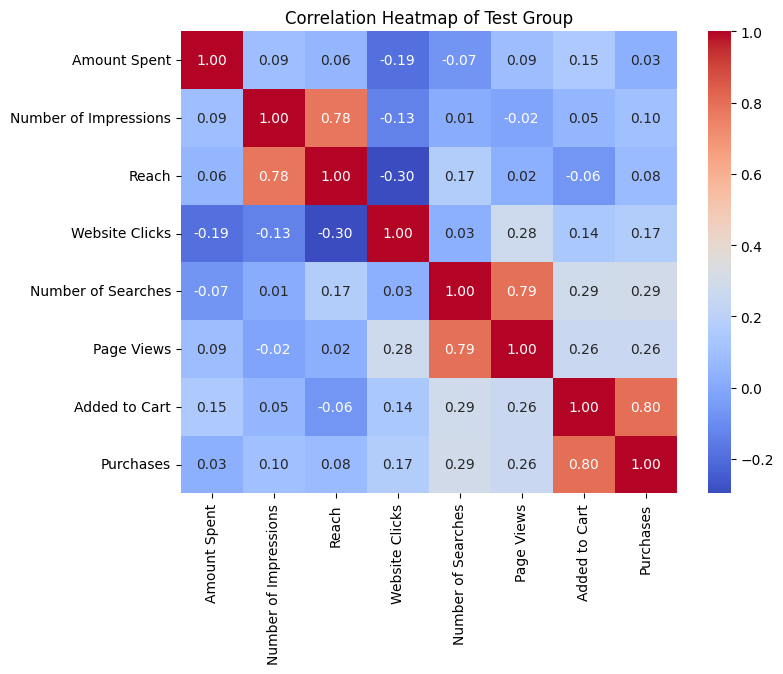

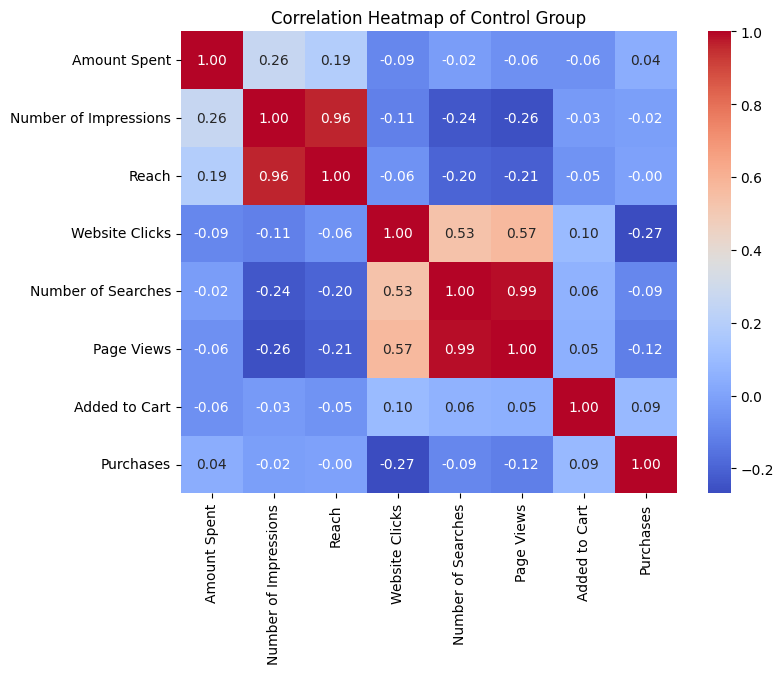

In [30]:
# test data corr
numeric_columns = ['Amount Spent', 'Number of Impressions',
       'Reach', 'Website Clicks', 'Number of Searches', 'Page Views',
       'Added to Cart', 'Purchases']
correlation_matrix = test_data[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Test Group')
plt.show()

# Control data corr
numeric_columns = ['Amount Spent', 'Number of Impressions',
       'Reach', 'Website Clicks', 'Number of Searches', 'Page Views',
       'Added to Cart', 'Purchases']
correlation_matrix = control_data[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Control Group')
plt.show()




_____

### Calculate CTR & CR

Click-Through Rate (CTR) = (Website Clicks / Number of Impressions) * 100

Conversion Rate (CR) = (Purchases / Website Clicks) * 100


In [12]:
# Calculate CTE and CR
data['CTR%'] = data['Website Clicks'] / data['Number of Impressions'] * 100
data['CR%'] = data['Purchases'] / data['Website Clicks'] * 100

In [13]:
average_metrics = data.groupby('Campaign Name')[['CTR%', 'CR%']].mean().reset_index()
average_metrics

,Campaign Name,CTR%,CR%
0,Control Campaign,5.087893,11.422146
1,Test Campaign,10.242260,9.231182


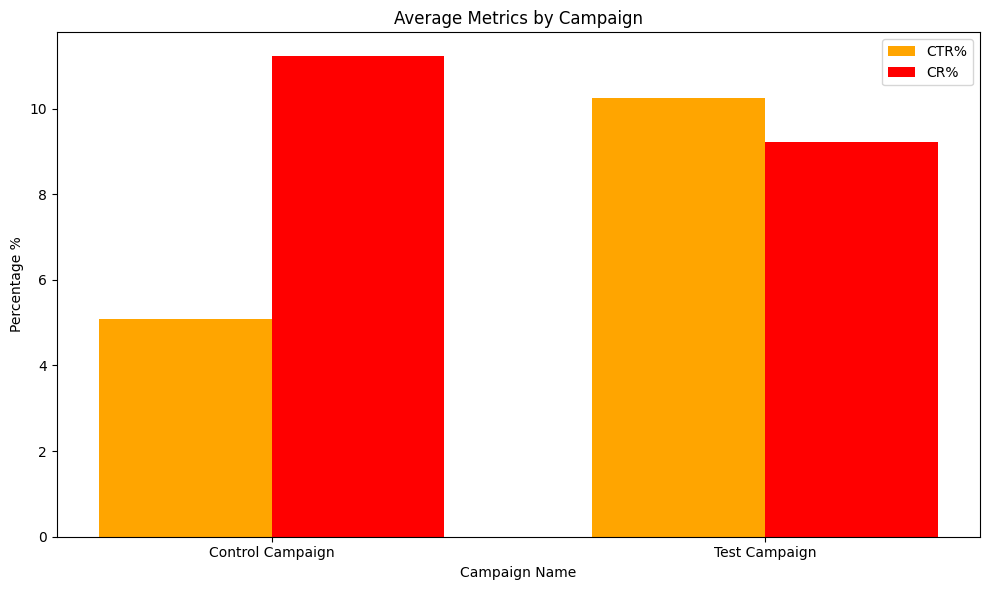

In [14]:
# Bar chart
average_metrics = pd.DataFrame({
    'Campaign Name': ['Control Campaign', 'Test Campaign'],
    'CTR%': [5.08793, 10.242260],
    'CR%': [11.22146, 9.231182]
})


bar_width = 0.35

index = np.arange(len(average_metrics))

plt.figure(figsize=(10, 6))


plt.bar(index, average_metrics['CTR%'], bar_width, color='orange', label='CTR%')

plt.bar(index + bar_width, average_metrics['CR%'], bar_width, color='red', label='CR%')

plt.xlabel('Campaign Name')
plt.ylabel('Percentage %')
plt.title('Average Metrics by Campaign')
plt.xticks(index + bar_width / 2, average_metrics['Campaign Name'])
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# Compare the groups status
summary_stats = data.groupby('Campaign Name').agg({
    'CTR%': ['mean', 'median', 'std', 'min', 'max'],
    'CR%': ['mean', 'median', 'std', 'min', 'max']
})
summary_stats.T

Campaign Name  Control Campaign  Test Campaign
CTR% mean              5.087893      10.242260
     median            4.788355       8.035887
     std               2.015575       6.770897
     min               1.857546       2.982351
     max               8.830912      33.821766
CR%  mean             11.422146       9.231182
     median           10.026463       8.454291
     std               6.726098       4.448987
     min               3.349427       3.008850
     max              32.235397      21.085051

Observation1: 

The Test-Group has a significantly higher CTR (10.24 vs. 5.09), indicating that the test ad is more engaging and attracts more clicks.

Observation2:

The Control-Group has a higher CR (11.22% vs. 9.23%), suggesting that despite the Test-Group's higher engagement, the Control-Group is better at converting those clicks into desired actions.

/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_72442/2405682701.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend().remove()
/var/folders/x_/08j42z3j22377xv4cbjvxw880000gn/T/ipykernel_72442/2405682701.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend().remove()


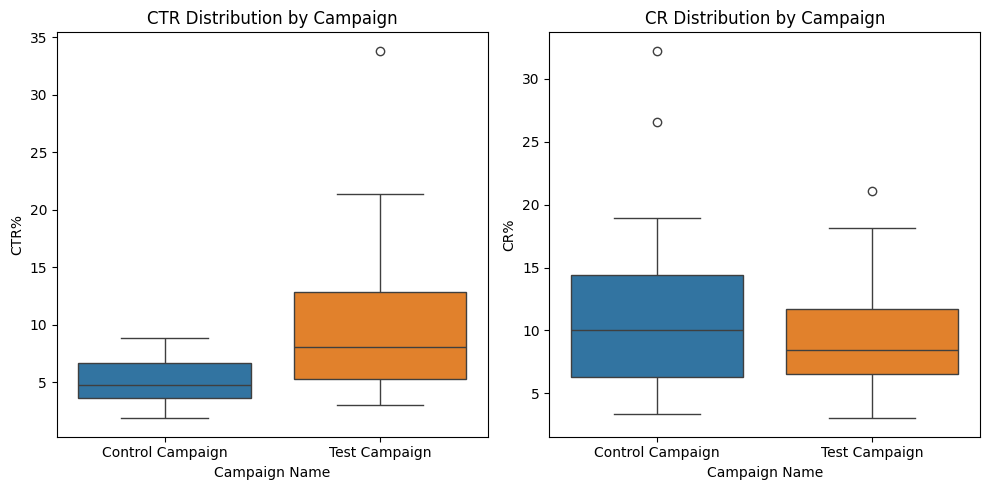

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x='Campaign Name', y='CTR%', data=data, 
            hue='Campaign Name', dodge=False, ax=axes[0])
axes[0].set_title('CTR Distribution by Campaign')
axes[0].legend().remove()

sns.boxplot(x='Campaign Name', y='CR%', data=data, 
            hue='Campaign Name', ax=axes[1])
axes[1].set_title('CR Distribution by Campaign')
axes[1].legend().remove()

plt.tight_layout()
plt.show()

The Test Campaign has shown a higher CTR, suggesting better engagement, but the Control Campaign still maintains a slightly higher CR. 

This mean, the ads is attractive but the landing page experience is bad. For example, the customers might not find what they were expecting on the landing page.

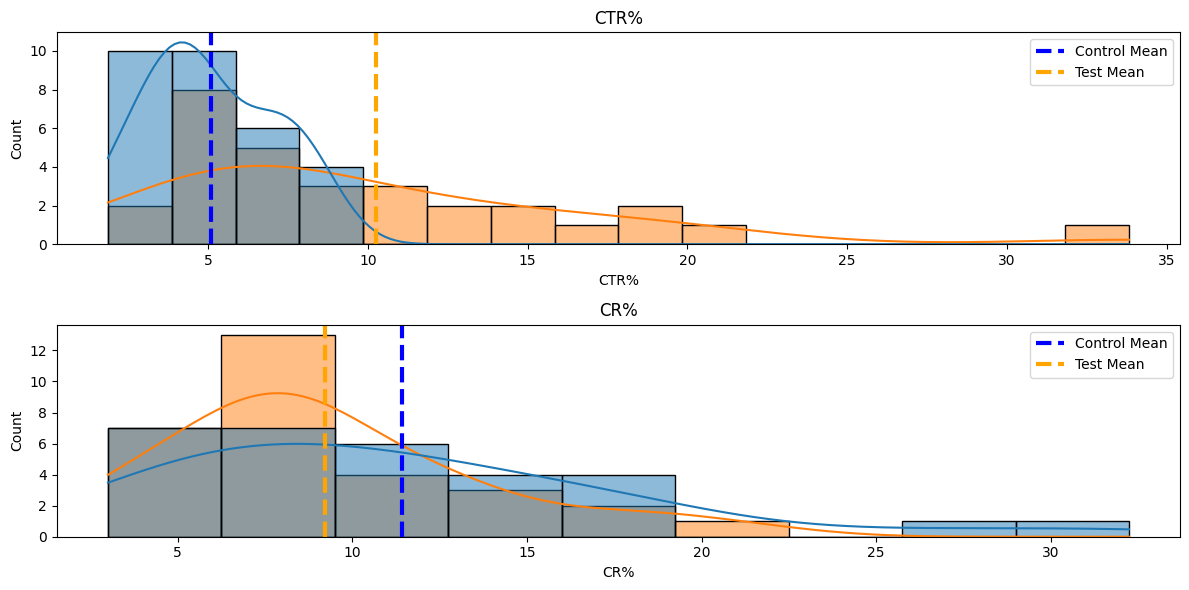

In [ ]:
metrics = ['CTR%', 'CR%']

# Calculate the average metrics for plotting mean lines
average_metrics = data.groupby('Campaign Name')[metrics].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each metric and create a histogram plot
for i, col in enumerate(metrics):
    sns.histplot(data=data, x=col, hue='Campaign Name', kde=True, palette='tab10', ax=axes[i])
    axes[i].set_title(f'{col}')
    
    # Add mean lines for Control and Test campaigns
    control_mean = average_metrics[average_metrics['Campaign Name'] == 'Control Campaign'][col].values[0]
    test_mean = average_metrics[average_metrics['Campaign Name'] == 'Test Campaign'][col].values[0]
    
    axes[i].axvline(control_mean, color='blue', linestyle='dashed', linewidth=3, label='Control Mean')
    axes[i].axvline(test_mean, color='orange', linestyle='dashed', linewidth=3, label='Test Mean')

    # Add legend
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Combining the analysis of CTR and CR, it can be seen that the test group ads may require more in-depth audience segmentation and precise positioning. Although it can attract higher traffic, the quality of this traffic may not be high enough to convert effectively. This may require further research into the target audience’s behaviour, interests and consumption habits in order to optimize the advertising strategy

_____


### Hypothesis

Null Hypothesis (H0): 

There is no significant difference in the proportion of purchasing behavior between the control group and the test group. In other words, the advertising campaign had the same impact on the purchasing behavior of both groups, and purchase rates were independent of the group.

Alternative Hypothesis (H1): 

There is a significant difference in the proportion of purchasing behavior between the control group and the test group.


In [ ]:
data.columns

Index(['Campaign Name', 'Date', 'Amount Spent', 'Number of Impressions',
       'Reach', 'Website Clicks', 'Number of Searches', 'Page Views',
       'Added to Cart', 'Purchases', 'CTR%', 'CR%'],
      dtype='object')

In [ ]:
metrics = ['Amount Spent', 'Number of Impressions', 'Reach', 'Website Clicks', 
           'Number of Searches', 'Page Views', 'Added to Cart', 'Purchases']

t_test_results = {}
for metric in metrics:
    t_stat, p_value = stats.ttest_ind(control_data[metric], test_data[metric], equal_var=False)
    t_test_results[metric] = {'t-statistic': t_stat, 'p-value': p_value}

In [ ]:
control_purchases_count = control_data['Purchases'].sum()
test_purchases_count = test_data['Purchases'].sum()

control_total_clicks = control_data['Website Clicks'].sum()
test_total_clicks = test_data['Website Clicks'].sum()

contingency_table = [
    [control_purchases_count, control_total_clicks - control_purchases_count],
    [test_purchases_count, test_total_clicks - test_purchases_count]
]
chi2, chi2_p_value, _, _ = stats.chi2_contingency(contingency_table)
print({'chi2-statistic': chi2, 'p-value': chi2_p_value})


{'chi2-statistic': 142.44088984709634, 'p-value': 7.788956793238821e-33}


Since the p-value (7.79 × 10^-33) is extremely small, much smaller than common significance levels (such as 0.05 or 0.01), we reject the null hypothesis (H0). This means that there is a statistically significant difference between the purchasing behavior of the control group and the test group. 

In other words, the advertising campaign had a significant impact on the purchasing behavior of the test group, indicating that advertising effectiveness was not the same between the two groups.

______

### Understand the impact of clicks on purchasing behavior

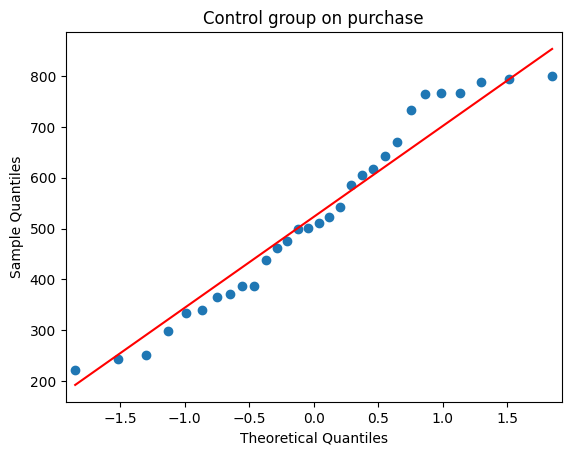

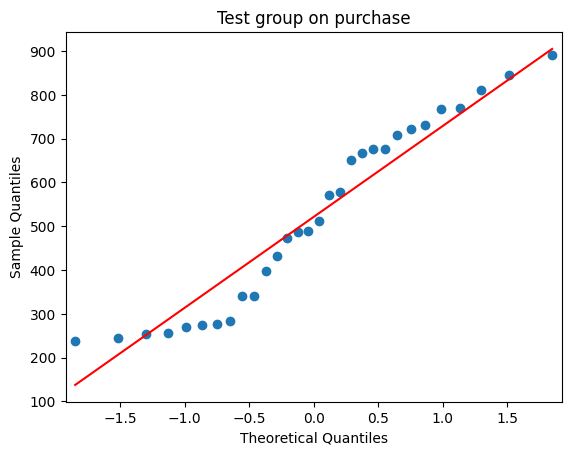

In [ ]:
control_purchases = control_data['Purchases']
test_purchases = test_data['Purchases']

sm.qqplot(control_purchases, line='s')
plt.title('Control group on purchase')
plt.show()

sm.qqplot(test_purchases, line='s')
plt.title('Test group on purchase')
plt.show()


The purchase data of the control group roughly conforms to the normal distribution. But the test group not.



In [ ]:
# Control
X_control = control_data[['Website Clicks']]
y_control = control_data['Purchases']

model_control = LinearRegression().fit(X_control, y_control)
control_coef = model_control.coef_[0]
control_intercept = model_control.intercept_
control_r_squared = model_control.score(X_control, y_control)

# Test
X_test = test_data[['Website Clicks']]
y_test = test_data['Purchases']
y_test_transformed = np.log1p(y_test) # Apply log to reduce skewness
model_test_robust = HuberRegressor().fit(X_test, y_test_transformed)
test_robust_coef = model_test_robust.coef_[0]
test_robust_intercept = model_test_robust.intercept_
test_robust_r_squared = model_test_robust.score(X_test, y_test_transformed)


In [ ]:
# Display regression results
regression_results = {
    'Control Group': {
        'Coefficient': control_coef,
        'Intercept': control_intercept,
        'R-squared': control_r_squared
    },
    'Test Group (Robust Regression)': {
        'Coefficient': test_robust_coef,
        'Intercept': test_robust_intercept,
        'R-squared': test_robust_r_squared
    }
}

regression_results

{'Control Group': {'Coefficient': -0.028305458531373787,
  'Intercept': 673.4005919919507,
  'R-squared': 0.07227504790829775},
 'Test Group (Robust Regression)': {'Coefficient': 0.0009234468102233876,
  'Intercept': 1.829619464578768e-07,
  'R-squared': -13.512514322943153}}

The control group results show that there is almost no significant relationship between the number of website clicks and the number of purchases, and most of the variation is caused by other factors.

The results of the test group show that although the robust regression method (Robust Regression) is used, the model effect is still poor, possibly because the data does not meet the assumptions of linear regression, or the relationship is too complex to be captured by a simple linear model.

____